In [1]:
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df = pd.read_csv('cancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [3]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [4]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [5]:
df.columns = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER']

In [6]:
df = df.replace({1: 0, 2: 1})

In [7]:
mapping = {'M': 1, 'F': 0}
df["GENDER"] = df['GENDER'].map(mapping)

In [8]:
mapping2 = {'YES': 1, "NO": 0}
df['LUNG_CANCER'] = df['LUNG_CANCER'].map(mapping2)
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,1,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,1,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,1,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


In [9]:
df.describe()
# all of the predictor columns are now int

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.524272,62.673139,0.563107,0.569579,0.498382,0.501618,0.504854,0.673139,0.556634,0.556634,0.556634,0.579288,0.640777,0.469256,0.556634,0.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,62.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
def fit_models(data, target_column):
    y = data[target_column]
    X = data.drop(columns=[target_column])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)
    
    predictors = X.columns.tolist()
    
    results = []
    
    for i in range(1, len(predictors) + 1):
        for combo in combinations(predictors, i):
            X_train_subset = X_train[list(combo)]
            X_test_subset = X_test[list(combo)]
            
            model = LogisticRegression(solver = 'liblinear', random_state = 24)
            model.fit(X_train_subset, y_train)
            y_pred = model.predict(X_test_subset)
            
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred)
            
            
            results.append({'Combination': ', '.join(combo),
                'Number of Predictors': len(combo),
                'ROC_AUC': roc_auc,
                'Accuracy': accuracy,
                'F1 Score': f1,
                'Coefficents': model.coef_[0]})

    results_sorted = sorted(results, key = lambda x: x['F1 Score'], reverse = True)
    
    return results_sorted

In [25]:
# run once (takes about 2 mins)
result = fit_models(df, 'LUNG_CANCER')
print('best model:', result[0])

best model: {'Combination': 'AGE, SMOKING, PEER_PRESSURE, CHRONIC_DISEASE, FATIGUE, ALLERGY, WHEEZING, ALCOHOL_CONSUMING, COUGHING, CHEST_PAIN', 'Number of Predictors': 10, 'ROC_AUC': 0.75, 'Accuracy': 0.9193548387096774, 'F1 Score': 0.9541284403669725, 'Coefficents': array([-0.0204279 ,  0.82312374,  0.9056796 ,  0.87563332,  1.06426535,
        1.56171649,  0.89949786,  1.37681976,  1.15240466,  0.4939955 ])}


In [26]:
result_df = pd.DataFrame(result)
result_df

,Combination,Number of Predictors,ROC_AUC,Accuracy,F1 Score,Coefficents
0,"AGE, SMOKING, PEER_PRESSURE, CHRONIC_DISEASE, ...",10,0.750000,0.919355,0.954128,"[-0.02042789702900085, 0.8231237417506873, 0.9..."
1,"AGE, SMOKING, YELLOW_FINGERS, CHRONIC_DISEASE,...",8,0.700000,0.903226,0.945455,"[-0.014932147050123037, 0.5740483736314185, 1...."
2,"GENDER, AGE, YELLOW_FINGERS, PEER_PRESSURE, CH...",9,0.700000,0.903226,0.945455,"[0.11050590518314708, -0.017301324903578424, 1..."
3,"AGE, YELLOW_FINGERS, PEER_PRESSURE, CHRONIC_DI...",9,0.700000,0.903226,0.945455,"[-0.017840098950559775, 1.6685779126202127, 0...."
4,"GENDER, AGE, YELLOW_FINGERS, PEER_PRESSURE, CH...",10,0.700000,0.903226,0.945455,"[0.12410644704734773, -0.022434231126384038, 1..."
...,...,...,...,...,...,...
32762,"GENDER, AGE, SMOKING, YELLOW_FINGERS, WHEEZING...",6,0.471154,0.790323,0.882883,"[0.404464382499172, 0.016031755133756813, 0.66..."
32763,"AGE, SMOKING, YELLOW_FINGERS, ANXIETY, WHEEZIN...",6,0.471154,0.790323,0.882883,"[0.016941564037465537, 0.6652874287636408, 0.5..."
32764,"GENDER, PEER_PRESSURE, FATIGUE, ALCOHOL_CONSUM...",8,0.471154,0.790323,0.882883,"[-0.362278424466774, 0.43509970053920144, 1.19..."
32765,"GENDER, AGE, PEER_PRESSURE, FATIGUE, ALCOHOL_C...",9,0.471154,0.790323,0.882883,"[-0.3548252315105676, -0.00440242222046361, 0...."


In [27]:
top10_df = result_df.head(10)
top10_df

,Combination,Number of Predictors,ROC_AUC,Accuracy,F1 Score,Coefficents
0,"AGE, SMOKING, PEER_PRESSURE, CHRONIC_DISEASE, ...",10,0.75,0.919355,0.954128,"[-0.02042789702900085, 0.8231237417506873, 0.9..."
1,"AGE, SMOKING, YELLOW_FINGERS, CHRONIC_DISEASE,...",8,0.70,0.903226,0.945455,"[-0.014932147050123037, 0.5740483736314185, 1...."
2,"GENDER, AGE, YELLOW_FINGERS, PEER_PRESSURE, CH...",9,0.70,0.903226,0.945455,"[0.11050590518314708, -0.017301324903578424, 1..."
3,"AGE, YELLOW_FINGERS, PEER_PRESSURE, CHRONIC_DI...",9,0.70,0.903226,0.945455,"[-0.017840098950559775, 1.6685779126202127, 0...."
4,"GENDER, AGE, YELLOW_FINGERS, PEER_PRESSURE, CH...",10,0.70,0.903226,0.945455,"[0.12410644704734773, -0.022434231126384038, 1..."
5,"GENDER, AGE, YELLOW_FINGERS, PEER_PRESSURE, CH...",10,0.70,0.903226,0.945455,"[0.003683192288800391, -0.01787209504902745, 1..."
6,"AGE, SMOKING, YELLOW_FINGERS, PEER_PRESSURE, C...",10,0.70,0.903226,0.945455,"[-0.01196941439390833, 0.6058550594349363, 1.2..."
7,"AGE, YELLOW_FINGERS, PEER_PRESSURE, CHRONIC_DI...",10,0.70,0.903226,0.945455,"[-0.018420857174955316, 1.6720216876650607, 0...."
8,"GENDER, AGE, SMOKING, PEER_PRESSURE, CHRONIC_D...",11,0.70,0.903226,0.945455,"[-0.1528499429307013, -0.019960453678123352, 0..."
9,"GENDER, AGE, YELLOW_FINGERS, PEER_PRESSURE, CH...",11,0.70,0.903226,0.945455,"[0.011144183479767401, -0.01841751105768075, 1..."


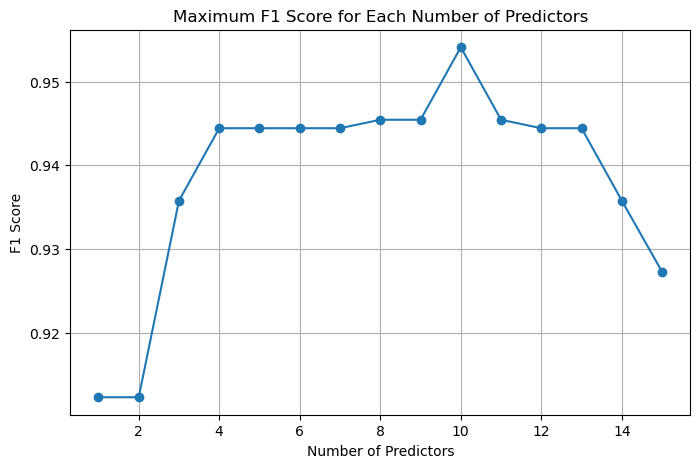

In [28]:
f1_by_predictor_count = result_df.groupby('Number of Predictors')['F1 Score'].max().reset_index()

# Plotting the aggregated data
plt.figure(figsize = (8, 5))
plt.plot(f1_by_predictor_count['Number of Predictors'], f1_by_predictor_count['F1 Score'], marker = 'o')
plt.xlabel('Number of Predictors')
plt.ylabel('F1 Score')
plt.title('Maximum F1 Score for Each Number of Predictors')
plt.grid(True)
plt.show()

In [29]:
combos = top10_df['Combination'].apply(lambda x: x.split(', '))

all_predictors = [predictor for sublist in combos for predictor in sublist]

predictor_counts = Counter(all_predictors)

predictor_counts_df = pd.DataFrame(predictor_counts.items(), columns=['Predictor', 'Count'])

predictor_counts_df.sort_values(by='Count', ascending=False, inplace=True)

print(predictor_counts_df)

              Predictor  Count
0                   AGE     10
3       CHRONIC_DISEASE     10
4               FATIGUE     10
5               ALLERGY     10
6              WHEEZING     10
2         PEER_PRESSURE      9
7     ALCOHOL_CONSUMING      9
10       YELLOW_FINGERS      8
9            CHEST_PAIN      7
11               GENDER      5
1               SMOKING      4
8              COUGHING      3
12  SHORTNESS_OF_BREATH      3


Based on this predictor frequency from the top 10 F1 score models, we will select the top 10 predictors based on frequency. Thus, we will fit another model with age, chronic_disease, fatigue, allergy, wheezing, peer_pressure, alcohol_consuming, yellow_fingers, chest_pain, and gender predictors.

In [30]:
final_df = df[['AGE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'PEER_PRESSURE', 'ALCOHOL_CONSUMING', 'YELLOW_FINGERS', 'CHEST_PAIN', 'GENDER','LUNG_CANCER']]
final_df

,AGE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,PEER_PRESSURE,ALCOHOL_CONSUMING,YELLOW_FINGERS,CHEST_PAIN,GENDER,LUNG_CANCER
0,69,0,1,0,1,0,1,1,1,1,1
1,74,1,1,1,0,0,0,0,1,1,1
2,59,0,1,0,1,1,0,0,1,0,0
3,63,0,0,0,0,0,1,1,1,1,0
4,63,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,0,0,1,1,0,0,0,1
305,70,0,1,1,1,0,1,0,1,1,1
306,58,0,0,1,1,0,1,0,1,1,1
307,67,0,1,1,0,0,1,0,1,1,1


In [31]:
final_X = final_df.drop(columns = ['LUNG_CANCER'])
final_y = final_df['LUNG_CANCER']

X_train2, X_test2, y_train2, y_test2 = train_test_split(final_X, final_y, test_size = 0.2, random_state = 24)

# Fit the logistic regression model
model2 = LogisticRegression(solver = 'liblinear', random_state = 24)
model2.fit(X_train2, y_train2)

# Make predictions
y_pred2 = model2.predict(X_test2)

# Evaluate the model
roc_auc = roc_auc_score(y_test2, y_pred2)
accuracy = accuracy_score(y_test2, y_pred2)
f1 = f1_score(y_test2, y_pred2)

In [32]:
print(f'ROC AUC Score: {roc_auc:.4f}')
print(f'Accuracy Score: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(model2.coef_)

ROC AUC Score: 0.7000
Accuracy Score: 0.9032
F1 Score: 0.9455
[[-0.0178721   0.69899415  1.3325096   1.78920148  1.00825528  0.6597497
   1.83964654  1.66743131  0.2812805   0.00368319]]


This model performs worse than the original best model from the original pool of models, so we should use the predictor combination from the originally selected model.